### Will a Customer Accept the Coupon?

**Context**
From analysis challenge:
'Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? [...] What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? [...]

**Initial Conclusions**

The coupon program is only 41% for bar coupons.

**However, the data suggests that targeting a particular segment may increase the bar coupon type acceptance.**

**Those that frequent a bar periodically are highly likely to accept a bar coupon as as long as they do not have kids in the car**

**The most promising age segment is age 21 to 31.**


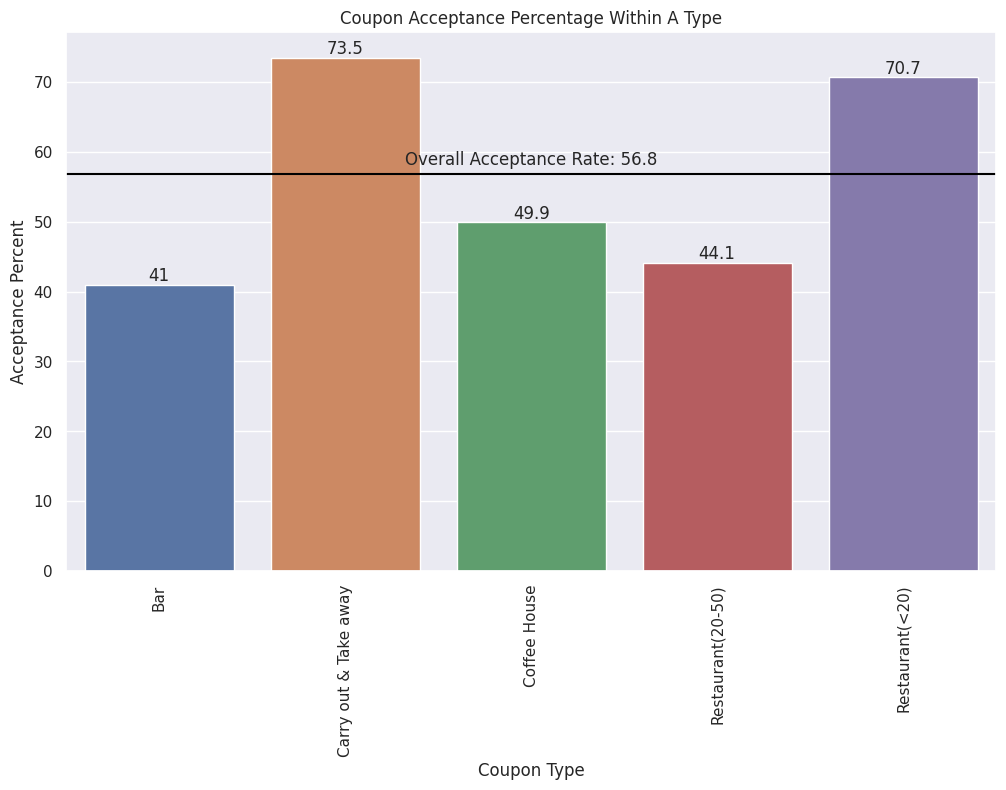

Bar visit frequency correlated to coupon acceptance


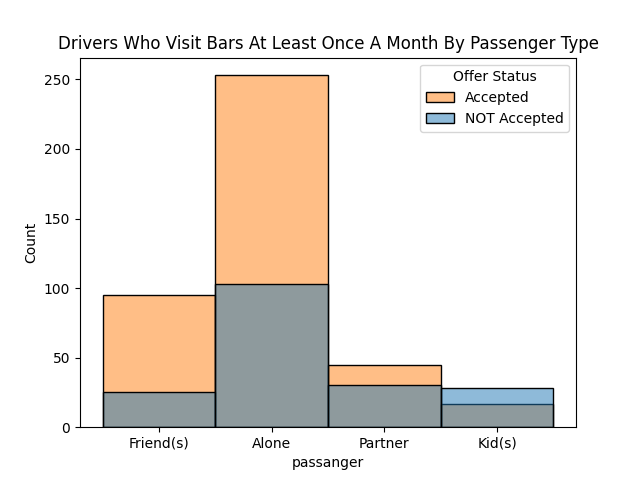


From a marketing business perspective, it will be important to determine how to ascertain who will not have a kid in the car. That may not be an actionable insight.

To strengthen the analysis, the following might be helpful:


1.   For periodic bar visitors, find acceptance rate related to various occupations and marital status. Look for correlations.
2.   Do a quick round of further analysis of other types of coupons to have a better idea if the bar coupon type is a strong relative segment to invest in.

After this analysis, look at the overall size of the demographics correlated to high acceptance rate. Also, assess the ability to target them with marketing. Given the relatively high acceptance rate of 'Carry Out & Takeaway' and inexpensive restaurants, it might be more profitable overall to analyze that data to look for large and actionable marketing targets. But if the demographic with high acceptance of bar coupon types is large enough and able to be targeted, then it is likely a worthwhile investment to grow this segment.

Lastly, I would try to get data on overall profitability of stores participating. Increasing the coupon acceptance rate of a segment already going frequently could have adverse effects on net profits.



**Data quality and meaning assumptions**

1.   The car columns is almost all nulls. Won't use it in the analysis.
2.   Cofee house, bar, carryaway, restlessthan20 and rest20to50 are missing in about 1-2% of the data set. Will change these values to 'Unknown' so that these values become more visible in charting.
3.   Assuming the GE toCouponGE[] columns means GreaterThanEqualTo. This makes sense because the toCouponGE5 data set has only 1(True) values while toCouponGE20 has some 0(False) values. Be aware of this overlap across these columns.
4.   In coupon field, going to assume Carryout & Takeway is mutually exclusive from the other fields. Meaning the coupon is exclusively about Carryout & Takeway from any type of food vendor (Restaurant, Bar, etc). Assuming we don't know where the Carryout & Takeaway was actually from.





**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
data_bar = data[data['coupon'] == 'Bar']
data_bar.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12241,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,50plus,Married partner,...,1~3,4~8,1~3,1~3,1,1,0,0,1,1
10933,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,31,Married partner,...,never,less1,less1,less1,1,1,0,0,1,0
9238,Home,Partner,Sunny,55,10PM,Bar,1d,Male,50plus,Married partner,...,never,1~3,1~3,less1,1,1,1,0,1,0
6765,Home,Partner,Rainy,55,10PM,Bar,1d,Female,31,Married partner,...,less1,gt8,4~8,1~3,1,1,0,0,1,0
11016,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [ ]:
# see work above to create data_grp_slice - will use these data slices

# within all bar coupons this many were accepted
print('Percent Bar Coupons accepted vs Bar Coupons Sent')
pct_bar_rel = data_grp_slice_pct[data_grp_slice_pct['Coupon_Type']=='Bar']['Acceptance_Pct']
print(pct_bar_rel.values[0])



# over all coupons sent, the proportion of bar coupons is
print('Percent Bar Coupons accepted vs ALL Coupons Sent')
pct_bar_all = round(data_grp_slice[(data_grp_slice['Accepted']=='Accepted') & (data_grp_slice['Coupon_Type'] == 'Bar') ]['Count']/total*100)
print(f"{pct_bar_all.values[0]}")

Percent Bar Coupons accepted vs Bar Coupons Sent
41.0
Percent Bar Coupons accepted vs ALL Coupons Sent
7.0


NOTE: Gave three statistics of acceptance because wording of question 2 was unclear to me - should it be a percentage of all bar coupons sent or of all coupons sent generally? I did both above.


In [ ]:
#  Bar coupons sent vs all coupons sent
print('Percent Bar Coupons Sent vs ALL Coupons Sent')
pct_bar_sent = round(data_grp_slice_pct[(data_grp_slice_pct['Coupon_Type'] == 'Bar') ]['Total_Count']/total*100)
print(f"{pct_bar_sent.values[0]}")

Percent Bar Coupons Sent vs ALL Coupons Sent
16.0


Since I calculated both within the bar type and also overall, I also shared percent of coupons sent that were the bar type to give a frame of reference for the total number of bar coupons sent.


Now that we have the acceptance rate of this type, let's drill down into it using other traits of these customers.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


The relative acceptance rate of those who went to a bar 3 or fewer times a month  VERSUS those who went more often:
37.1 vs 76.9
---
The total number of those who went to a bar 3 or fewer times a month  VERSUS those who went more often:
666 vs 153


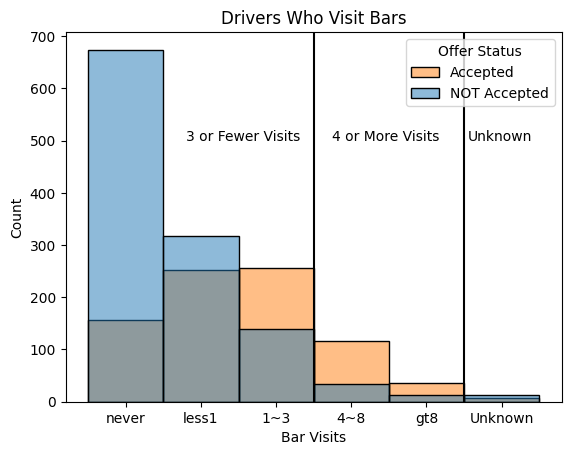

In [ ]:
data_bar2 = None
from os import RTLD_NOW
from re import X
# from earlier analysis of values in this column
#never    5197
#less1    3482
#1~3      2473
#4~8      1076]
#gt8       349

# Note the awkward text-based way the data was stored, makes numerical queries require more work
# create lists of each criteria and use the .isin() to match them to the data in the Bar categorical column
less_list = ['less1', '1~3', 'never']
more_list = ['4~8', 'gt8']

# now gather the data to answer the question
data_bar_less_accepted = data_bar[(data_bar['Bar'].isin(less_list)) & (data_bar['Y']==1)]
data_bar_less_all = data_bar[(data_bar['Bar'].isin(less_list))]
data_bar_more_accepted = data_bar[data_bar['Bar'].isin(more_list) & (data_bar['Y']==1)]
data_bar_more_all = data_bar[data_bar['Bar'].isin(more_list)]

print('The relative acceptance rate of those who went to a bar 3 or fewer times a month  VERSUS those who went more often:')
print(f"{round(data_bar_less_accepted['Y'].count()/data_bar_less_all['Y'].count()*100,1)} vs {round(data_bar_more_accepted['Y'].count()/data_bar_more_all['Y'].count()*100,1)}")
print('---')
print('The total number of those who went to a bar 3 or fewer times a month  VERSUS those who went more often:')
print(f"{round(data_bar_less_accepted['Y'].count(),1)} vs {round(data_bar_more_accepted['Y'].count(),1)}")

# also to get a proper sort order on a supporting chart use pd.Categorical
# Add this new categorical field to the original data frame - not  the slice
data['Bar Visits'] = pd.Categorical(data['Bar'],['never','less1','1~3','4~8','gt8','Unknown'])

# Reslice the data with this new column included
data_bar2 = data[data['coupon'] == 'Bar']

# Create an ordered chart to illustrate the main point
chart = sns.histplot(data=data_bar2[['Y','Bar Visits']],x='Bar Visits', hue='Y')
chart.set(title='Drivers Who Visit Bars')
chart.legend(title="Offer Status", labels=["Accepted", "NOT Accepted"])
chart.axvline(x = 2.5, ymin = 0, ymax = 1, color = 'black')
chart.text(.8, 500, "3 or Fewer Visits")
chart.text(2.75, 500, "4 or More Visits")
chart.text(4.55, 500, "Unknown")
chart.axvline(x = 4.5, ymin = 0, ymax = 1, color = 'black')

# save for final report. uncomment if you want to regen
plt.savefig('bar_visits.png', format='png')
plt.show()



So this result may indicate that those that go to a bar very often are incentivized further by coupons. But note that there are only 153 of these frequent bar visitors.

One business issue: Giving coupons to someone already going frequently may degrade overall profit margins.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Those that go to bar at least once a month and are over 25 accept at this rate: : 69.5% -> 292 of 420
Those that go to bar less than once a month or are less than or equal to 25 accept at this rate: : 33.5% -> 535 of 1597
Be aware that data set contains drivers for which we have no data about their bar frequency. This group accepts at a rate of: : 38.1% -> 8 of 21


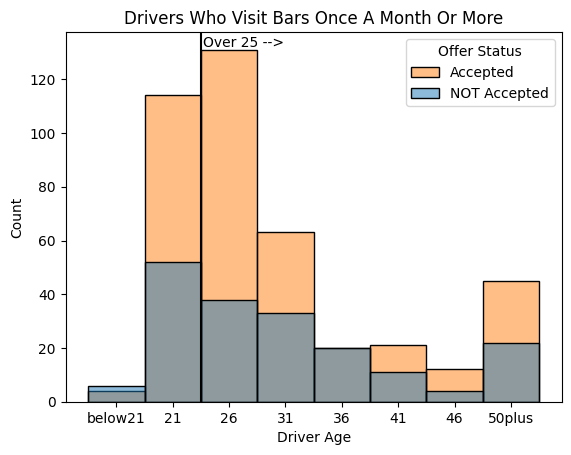

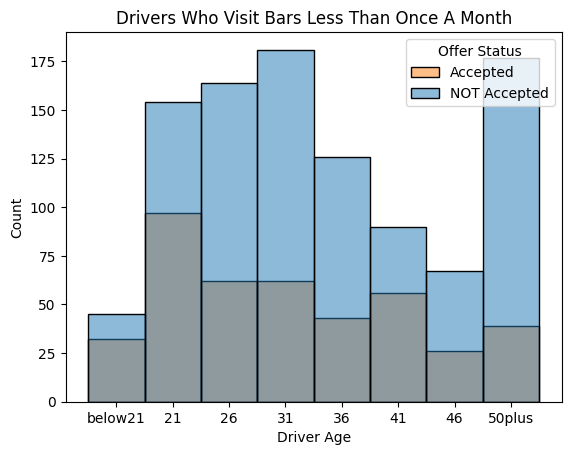

In [ ]:
# from earlier analysis of column values
#age
#21         2653
#26         2559
#31         2039
#50plus     1788
#36         1319
#41         1093
#46          686
#below21     547
# again note the use of text like 'below21' prevents numerical querying.
# Use the isin() list technique to compensate

# NOTE: Also the data set does not breakout 'more than once a month' to a bar exactly
# use greater than equal to as proxy. In other words, analyzing 'Once a month or more'

# NOTE: The question doesn't clarify 'acceptance rate'. Does it mean acceptance rate of bar coupons or any coupon?
# This analysis will assume 'acceptance rate of bar coupons'.

bar_ge1_list = ['1~3','4~8', 'gt8']
age_gt25_list = ['26', '31','36', '41', '46', '50plus']
data_bar_ge1_and_gt25 = data_bar[(data_bar['Bar'].isin(bar_ge1_list)) & (data_bar['age'].isin(age_gt25_list))]

# count how many found in this grouping
in_total =data_bar_ge1_and_gt25['Y'].count()

# count how many of these accepted the coupon
in_accepted_count = data_bar_ge1_and_gt25[data_bar_ge1_and_gt25['Y']==1]['Y'].count()

# get the percentage accepted = the number of accepted in that group divided by the total number in that group
bar_ge1_and_gt25 = in_accepted_count/in_total
print(f"Those that go to bar at least once a month and are over 25 accept at this rate: \
: {round(bar_ge1_and_gt25*100,1)}% -> {in_accepted_count} of {in_total}")

# Repeat same solution pattern from above BUT this time get the opposite or negation set of the above
# In boolean logic, the negation of “A and B"“not(A) OR not(B)”
# So we are looking for those that go to bar less than once a month or are less than or equal to 25 accept at this rate
# Use the ~ character in front of dataframe when using .isin() to get NOT isin result
data_bar_lt1_or_le25 = data_bar[(~data_bar['Bar'].isin(bar_ge1_list)) | (~data_bar['age'].isin(age_gt25_list))]

out_total =data_bar_lt1_or_le25['Y'].count()
out_accepted_count = data_bar_lt1_or_le25[data_bar_lt1_or_le25['Y']==1]['Y'].count()
bar_lt1_or_le25 = out_accepted_count/out_total
print(f"Those that go to bar less than once a month or are less than or equal to 25 accept at this rate: \
: {round(bar_lt1_or_le25*100,1)}% -> {out_accepted_count} of {out_total}")

# Finally for completeness, a reminder that some 'Bar' traits data is Unknown.
# How often do the Unknown records accept?
bar_unknown = data_bar[data_bar['Bar'] == 'Unknown']
bar_unknown_total =bar_unknown['Y'].count()
bar_unknown_accept = bar_unknown[bar_unknown['Y'] == 1]['Y'].count()
bar_uknown_accept_pct = round(bar_unknown_accept/bar_unknown_total*100,1)
print(f"Be aware that data set contains drivers for which we have no data about their bar frequency. This group accepts at a rate of: \
: {bar_uknown_accept_pct}% -> {bar_unknown_accept} of {bar_unknown_total}")

# for illustration support, show histogram of drivers who visit bars 1 or more times grouped by age

sorted_age_list = ['below21','21','26', '31','36', '41', '46', '50plus']
data['Driver Age'] = pd.Categorical(data['age'], sorted_age_list)
data_bar_ge1 = data[(data['coupon'] == 'Bar') & (data['Bar'].isin(bar_ge1_list))]
# Create an ordered chart to illustrate the main point
chart = sns.histplot(data=data_bar_ge1[['Y','Driver Age']],x='Driver Age', hue='Y')
chart.legend(title="Offer Status", labels=["Accepted", "NOT Accepted"])
chart.set(title='Drivers Who Visit Bars Once A Month Or More')
chart.axvline(x = 1.5, ymin = 0, ymax = 1, color = 'black')
chart.text(1.54, 132, "Over 25 -->")

# save for final report. uncomment if you want to regen
plt.savefig('bar_age.png', format='png')

plt.show()

# for illustration support, show histogram of drivers who visit bars less than once by age
data_bar_lt1 = data[(data['coupon'] == 'Bar') & (~data['Bar'].isin(bar_ge1_list))]
# Create an ordered chart to illustrate the main point
chart2 = sns.histplot(data=data_bar_lt1[['Y','Driver Age']],x='Driver Age', hue='Y')
chart2.legend(title="Offer Status", labels=["Accepted", "NOT Accepted"])
chart2.set(title='Drivers Who Visit Bars Less Than Once A Month')
plt.show()

For the data we have that is clean/known, those that are over 25 and go to a bar once a month ACCEPT more than twice as often as others: **69.5 vs 33.5 is a significant difference.**
We can possibly infer that periodic bar customers that are over 25 are highly positively incentivized by coupons.

Looking at the two supporting charts gives a fuller picture of how age and bar visits affect the bar coupon acceptance rate. For drivers that visit a bar at least once a month, it suggest that the **21 to 31 segment and the 50plus segments might be the optimal group**. However, the sparse set of age data should provide caution in drawing strong conclusions.

And once again, the goal is probably not high coupon acceptance, but instead total profit. **Giving coupons to people that are already coming may not increase overall profit. Therefore, may want to do analysis on visitors who currently come only once a month to see over time if a coupon can get them to come 2 or more times a month.** Currently, our data set doesn't break out visitors that come only once a month. Could use the group less than once a month as a proxy until more granular data could be collected.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Now let's query for other characteristics of drivers
# Occupation fields to check
excl_occupation = 'Farming Fishing & Forestry'
# types of passengers
not_a_kid_list = ['Alone','Friend(s)', 'Partner']
# data_p5a is:
# Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
data_p5a = data_bar[(data_bar['Bar'].isin(bar_ge1_list)) & (data_bar['passanger'].isin(not_a_kid_list)) & (data_bar['occupation'] != excl_occupation)]

# Get their acceptance rate
p5a_out_total =data_p5a['Y'].count()
p5a_out_accepted_count = data_p5a[data_p5a['Y']==1]['Y'].count()
p5a_accept_pct = round(p5a_out_accepted_count/p5a_out_total*100, 1)
print(f"For people that go to bar once a month or more, who are not driving kid passengers, and are not in the 'Farming, Fishing & Forestry' industry,")
print (f"They accept bar coupons at this rate: {p5a_accept_pct}% -> {p5a_out_accepted_count} of {p5a_out_total}")

# Now get the negation set
# People who DO NOT go to bar once a month or more OR who ARE driving kid passengers OR ARE in the 'Farming, Fishing & Forestry' industry,
data_p5b = data_bar[(~data_bar['Bar'].isin(bar_ge1_list)) | (~data_bar['passanger'].isin(not_a_kid_list)) | (data_bar['occupation'] == excl_occupation)]

# Get the negation set acceptance rate
p5b_out_total =data_p5b['Y'].count()
p5b_out_accepted_count = data_p5b[data_p5b['Y']==1]['Y'].count()
p5b_accept_pct = round(p5b_out_accepted_count/p5b_out_total*100, 1)
print('---')
print(f"For people that DO NOT go to bar once a month or more OR who ARE driving kid passengers OR ARE in the 'Farming, Fishing & Forestry' industry,")
print (f"They accept bar coupons at this rate: {p5b_accept_pct}% -> {p5b_out_accepted_count} of {p5b_out_total}")




For people that go to bar once a month or more, who are not driving kid passengers, and are not in the 'Farming, Fishing & Forestry' industry,
They accept bar coupons at this rate: 71.3% -> 393 of 551
---
For people that DO NOT go to bar once a month or more OR who ARE driving kid passengers OR ARE in the 'Farming, Fishing & Forestry' industry,
They accept bar coupons at this rate: 29.6% -> 434 of 1466


The difference is significant. However, this particular narrow combination does not tell us too much necessarily. It would be interesting to see the acceptance rate without the industry criteria.

**If kids are not in the car, it seems a reasonable hypothesis that you would be more likely to accept a coupon to go to a bar.** Let's look...

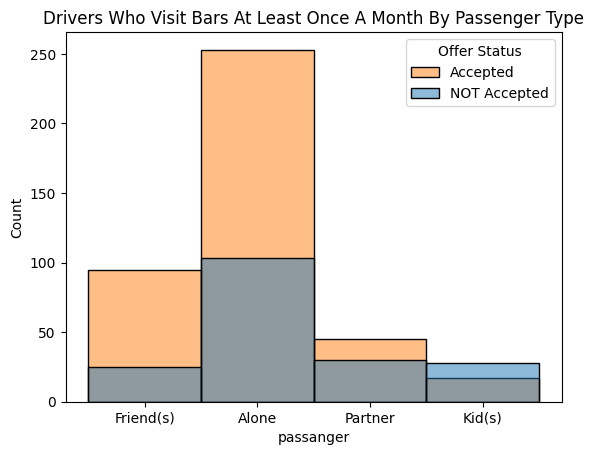

In [ ]:
# bar chart of once a month bar visits grouped by passanger type
# Create an ordered chart to illustrate the main point
chart2 = sns.histplot(data=data_bar_ge1[['Y','passanger']],x='passanger', hue='Y')
chart2.legend(title="Offer Status", labels=["Accepted", "NOT Accepted"])
chart2.set(title='Drivers Who Visit Bars At Least Once A Month By Passenger Type')

# save for final report. uncomment if you want to regen
plt.savefig('bar_passengers.png', format='png')
plt.show()

Supports the idea of focusing on drivers without kids as passengers.

But also supports idea of not including those driving with their partner.

Visually we can see that Friends as passengers has the highest acceptance ratio, but that the number of drivers that are alone is larger and with a relatively good acceptance ratio.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
# ASSUMPTION: This question still wants to analyze the bar type coupons, not coupons generally
# ASSUMPTION BASED ON QUESTION WORDING: Asks for 3 Criteria groups to combine in a logical OR operation and then analyze that single resulting group

# FIRST, Create 3 dataframes that each match a criteria

# Criteria Group 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
# marital status fields to check
excl_marital_status = 'Widowed'
# types of passengers
not_a_kid_list = ['Alone','Friend(s)', 'Partner']

# data_p6a1: subset meeting this criteria 1
data_p6a1 = data_bar[(data_bar['Bar'].isin(bar_ge1_list)) & (data_bar['passanger'].isin(not_a_kid_list)) & (data_bar['maritalStatus'] != excl_marital_status)]

# Criteria Group 2: go to bars more than once a month and are under the age of 30
# age list
incl_age_list = ['below21','21','26']
# data_p6a2: subset meeting this criteria 2
data_p6a2 = data_bar[(data_bar['Bar'].isin(bar_ge1_list)) & (data_bar['age'].isin(incl_age_list))]

# Criteria Group 3: go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_restaurant_visits_list = ['4~8','gt8']
incl_income_list = ['$25000 - $37499','$12500 - $24999','$37500 - $49999']

# data_p6a3: subset meeting this criteria 3
# Note that NOT using frequency of visits to bars here
data_p6a3 = data_bar[data_bar['RestaurantLessThan20'].isin(cheap_restaurant_visits_list) & (data_bar['income'].isin(incl_income_list))]


# Ok So now have 3 dataframes meeting the 3 criteria
# SECOND, Need to concatenate the rows of them and then drop duplicates to get our answer
# data_p6b is the logical OR of the previous data sets
data_p6b = pd.concat([data_p6a1, data_p6a2, data_p6a3], ignore_index=True)
data_p6b.drop_duplicates(ignore_index = True, inplace = True)

# find the acceptance rate of this combination
p6b_total =data_p6b['Y'].count()
p6b_accepted_count = data_p6b[data_p6b['Y']==1]['Y'].count()
p6b_accept_pct = round(p6b_accepted_count/p6b_total*100, 1)
print("Comparing the acceptance rates between those drivers who:")
print("1 - go to bars more than once a month, had passengers that were not a kid, and were not widowed OR")
print("2 - go to bars more than once a month and are under the age of 30 OR")
print("3 - go to cheap restaurants more than 4 times a month and income is less than 50K.")
print('---')
print(f"For people that meet the LOGICAL OR of the 3 criteria groups of this question:")
print (f"They accept coupons at this rate: {p6b_accept_pct}% -> {p6b_accepted_count} of {p6b_total}")


Comparing the acceptance rates between those drivers who:
1 - go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
2 - go to bars more than once a month and are under the age of 30 OR
3 - go to cheap restaurants more than 4 times a month and income is less than 50K.
---
For people that meet the LOGICAL OR of the 3 criteria groups of this question:
They accept coupons at this rate: 61.2% -> 444 of 725


But let's look at the acceptance rate of each criteria group on its own. That might be more revealing about the nature of bar coupon acceptance.

In [ ]:
# Calculte acceptance for those just meetin criteria group 1
p6a1_total =data_p6a1['Y'].count()
p6a1_accepted_count = data_p6a1[data_p6a1['Y']==1]['Y'].count()
p6a1_accept_pct = round(p6a1_accepted_count/p6a1_total*100, 1)
print("Comparing the acceptance rates between those drivers who:")
print("1 - go to bars more than once a month, had passengers that were not a kid, and were not widowed")
print('---')
print (f"They accept coupons at this rate: {p6a1_accept_pct}% -> {p6a1_accepted_count} of {p6a1_total}")

Comparing the acceptance rates between those drivers who:
1 - go to bars more than once a month, had passengers that were not a kid, and were not widowed
---
They accept coupons at this rate: 71.3% -> 393 of 551


This is a relatively high acceptance rate! If those in the dataset go to bar with moderate frequency and don't have kids in the car at the time of receiving the coupon, they may be more likely to go to the bar. But would need to look at other factors before concluding a causal relationship.

For now, let's move to criteria group 2...

In [ ]:
# Calculte acceptance for those just meeting criteria group 2
p6a2_total =data_p6a2['Y'].count()
p6a2_accepted_count = data_p6a2[data_p6a2['Y']==1]['Y'].count()
p6a2_accept_pct = round(p6a2_accepted_count/p6a2_total*100, 1)
print("Comparing the acceptance rates between those drivers who:")
print("2 - go to bars more than once a month and are under the age of 30")
print('---')
print (f"They accept coupons at this rate: {p6a2_accept_pct}% -> {p6a2_accepted_count} of {p6a2_total}")

Comparing the acceptance rates between those drivers who:
2 - go to bars more than once a month and are under the age of 30
---
They accept coupons at this rate: 72.2% -> 249 of 345


Another high acceptance rate! But an even smaller population proportion of the full data set. Again, worth investigating further and getting more age ranges in the next data set. As per an earlier chart commentary, perhaps including age 31 is worthwhile.

For now, let's look at criteria group 3...

In [ ]:
# Calculate acceptance for those just meeting criteria group 3
p6a3_total =data_p6a3['Y'].count()
p6a3_accepted_count = data_p6a3[data_p6a3['Y']==1]['Y'].count()
p6a3_accept_pct = round(p6a3_accepted_count/p6a3_total*100, 1)
print("Comparing the acceptance rates between those drivers who:")
print("3 - go to cheap restaurants more than 4 times a month and income is less than 50K.")
print('---')
print (f"They accept coupons at this rate: {p6a3_accept_pct}% -> {p6a3_accepted_count} of {p6a3_total}")

Comparing the acceptance rates between those drivers who:
3 - go to cheap restaurants more than 4 times a month and income is less than 50K.
---
They accept coupons at this rate: 45.8% -> 124 of 271


This criteria is a very different slice of the data - a nice control check. Looking at other factors besides bar visit frequency, age, and passengers helps us see how significant and promising the previous acceptance rates are!

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## To The Assignment Grading Team:



*   I focused my extensive independent investigation efforts analyzing and illustrating more detail about the bar coupons throughout above.

*   Also I did an analysis of acceptance by bar coupon type vs the overall average above. Repeated here for convenience

I beleive these two points satisfy the goal of doing a full independent investigation





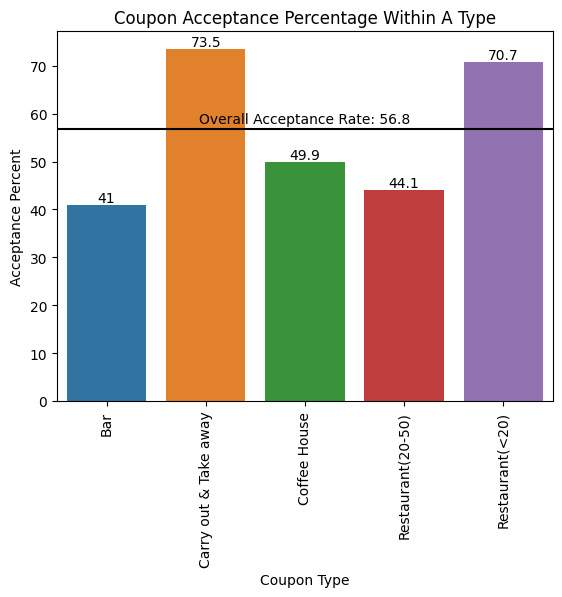

In [ ]:
chart = sns.barplot(data=data_grp_slice_pct, x='Coupon_Type', y='Acceptance_Pct',errorbar=None)

#rotating x-axes values for better viz
plt.xticks(rotation = 'vertical')
#labeling
plt.title('Coupon Acceptance Percentage Within A Type')
plt.xlabel(f'Coupon Type')
plt.ylabel(f'Acceptance Percent')
for i in chart.containers:
    chart.bar_label(i,)
plt.axhline(y=accepted/total*100, color='black')
plt.text(2, 2+(accepted/total*100), f"Overall Acceptance Rate: {accepted/total*100:.1f}", ha="center", va="center")
plt.show()